In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading And Cleaning Data

In [2]:
data = pd.read_csv('customer_churn_dataset-training-master.csv')
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
#check for null values

data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
# null values are removed

data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
# check the details of data

data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [76]:
max()

148678

# Analysis of Data

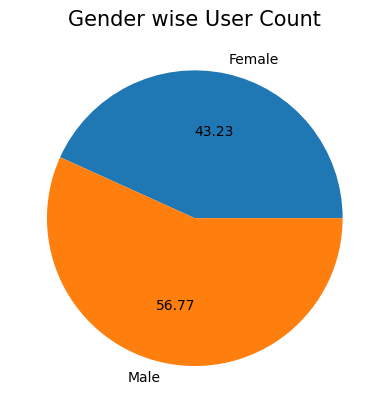

In [62]:
plt.title('Gender wise User Count',fontsize = 15)
ax = data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
for bars in ax.containers:
    ax.bar_label(bars)

# From above graph we can see that most of the users are male.

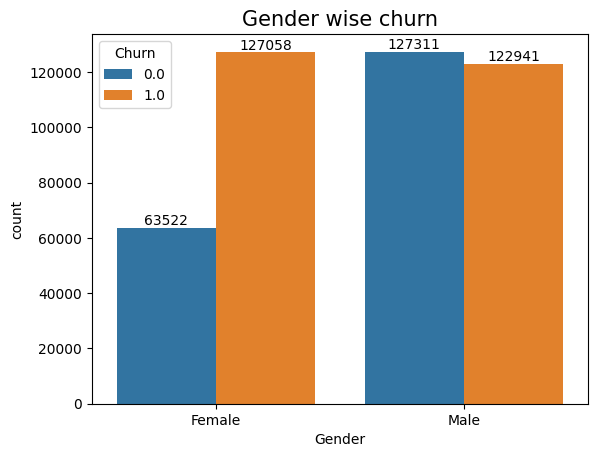

In [61]:
plt.title('Gender wise churn',fontsize = 15)
ax = sns.countplot(x = 'Gender',data = data, hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)

 # From above chart we can state there is a high rise in churn count in case of female.

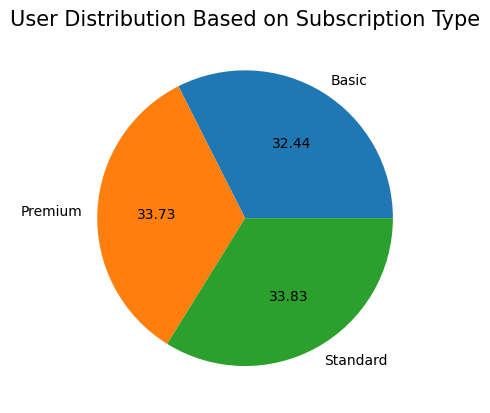

In [68]:
plt.title('User Distribution Based on Subscription Type',fontsize = 15)
ax = data.groupby('Subscription Type').size().plot(kind='pie', autopct='%.2f')
for bars in ax.containers:
    ax.bar_label(bars)

# From above chart we can see that most users have Standard Subsciption.

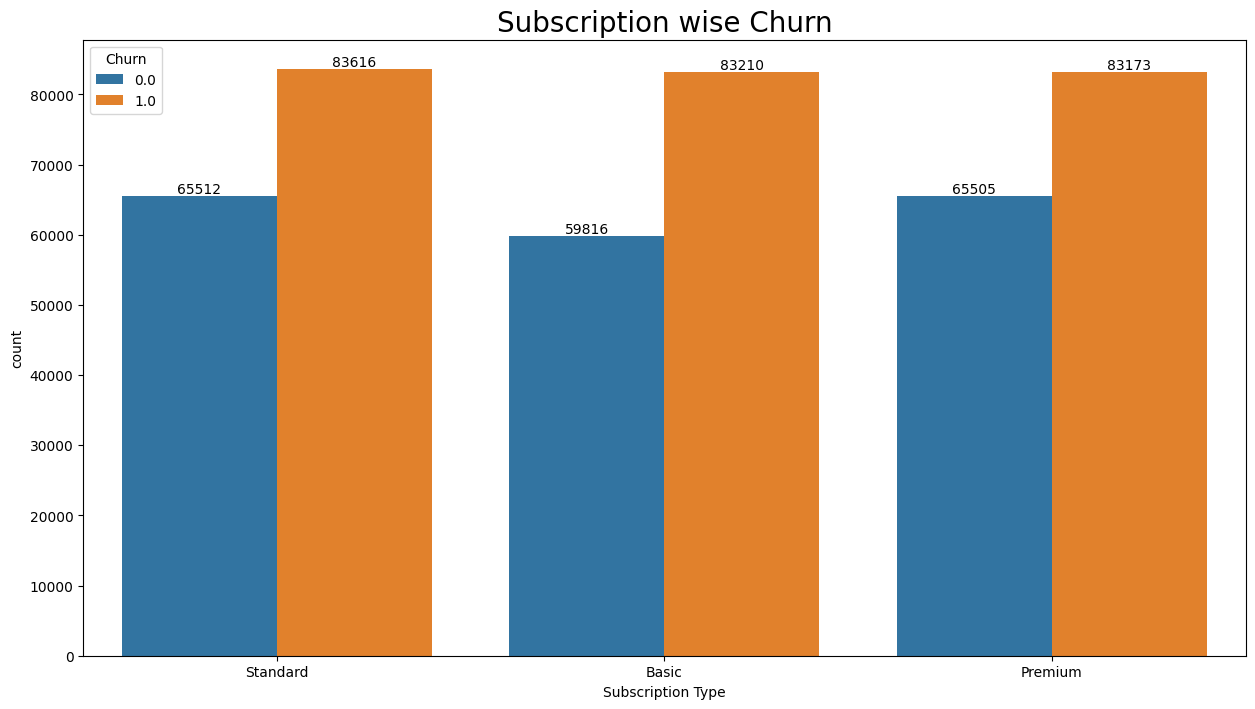

In [63]:
plt.figure(figsize = (15,8))
plt.title('Subscription wise Churn',fontsize = 20)
ax = sns.countplot(x = 'Subscription Type',
              data = data, 
              hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)

# We can see that there is less churn in Premium Subscription and High in Standard Subscription

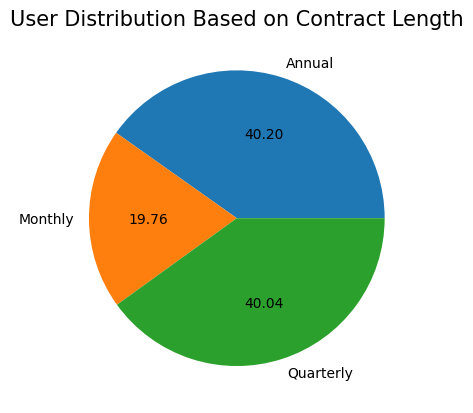

In [64]:
plt.title('User Distribution Based on Contract Length',fontsize = 15)
ax = data.groupby('Contract Length').size().plot(kind='pie', autopct='%.2f')
for bars in ax.containers:
    ax.bar_label(bars)

# From above graph we can say that most of the users have Annual Contract followed by Quaterly Contract 

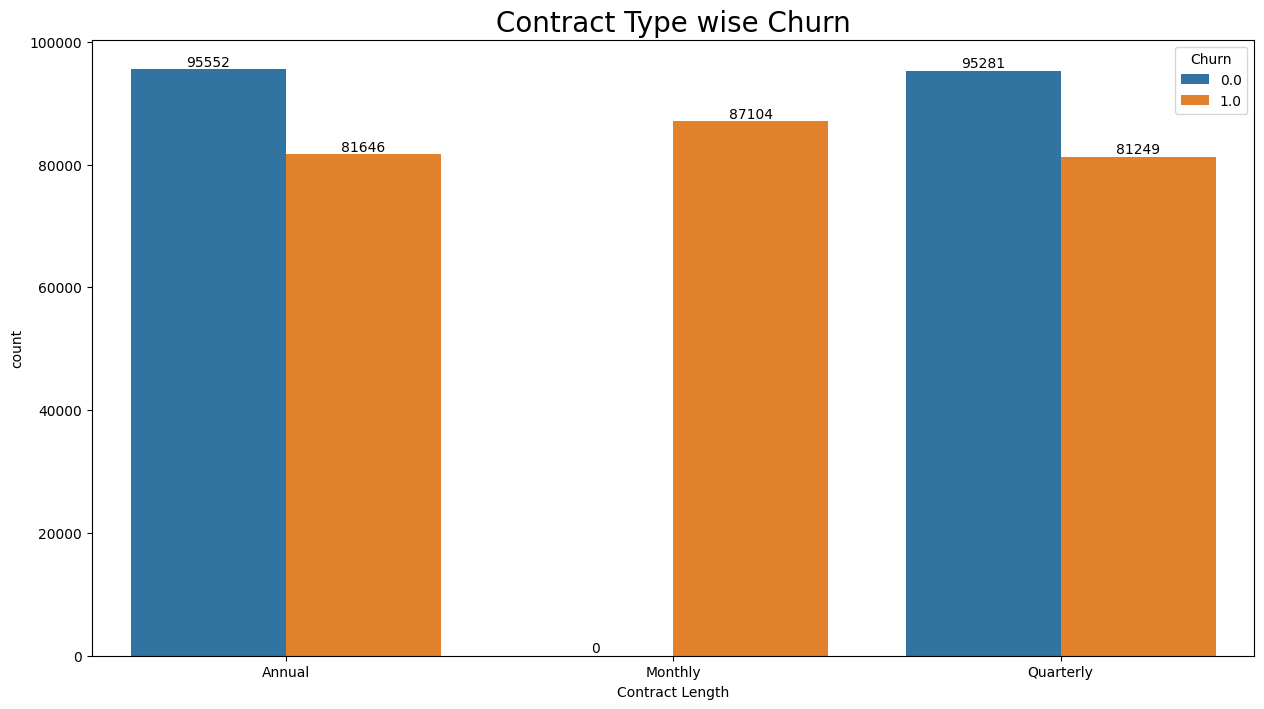

In [65]:
plt.figure(figsize = (15,8))
plt.title('Contract Type wise Churn',fontsize = 20)
ax = sns.countplot(x = 'Contract Length',
              data = data, 
              hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)

# From the chart we can see that all the users who had Montly Contract have been Churned

In [87]:
# Maxmium Amount and Type of Subscription 

data.loc[data['Total Spend'].idxmax()]

CustomerID              1890.0
Age                       36.0
Gender                    Male
Tenure                    27.0
Usage Frequency            3.0
Support Calls              1.0
Payment Delay             30.0
Subscription Type     Standard
Contract Length      Quarterly
Total Spend             1000.0
Last Interaction          14.0
Churn                      1.0
Name: 1881, dtype: object

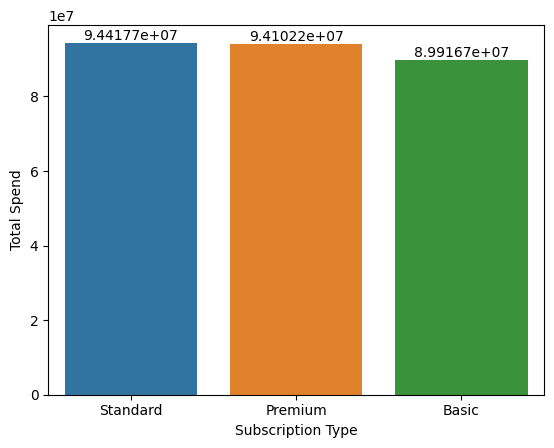

In [80]:
Subs_Type = data.groupby(['Subscription Type'],as_index = False)['Total Spend'].sum().sort_values(by = 'Total Spend',ascending = False)
ax = sns.barplot(x = 'Subscription Type',y = 'Total Spend',data = Subs_Type)
for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can say that as there is not much difference between Standard and Premium Subscription, So that can be one of the reason for churn in Standard Subscription